In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from math import factorial
import pandas as pd

# Taller 1

1. Un programa que grafique en una sola figura pero independientes las siguientes funciones en un intervalo de $[1, 4]$ con $10$ puntos y $1000$ puntos. Las funciones son: $x^{2}, x^{3}, \sqrt{x}, \frac{1}{x}$  

2. Realizar un programa que imprima los numeros del $1$ al $100$ que sea multiplo de $3$ y que sean impares.

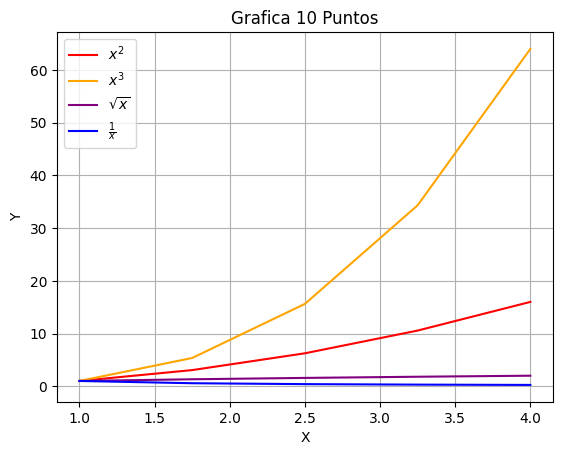

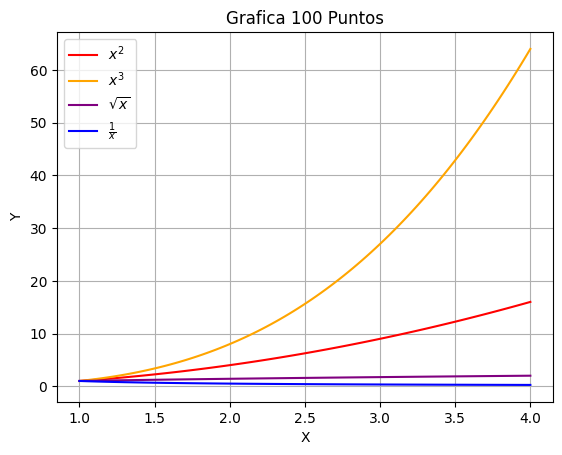

In [13]:


line_10 = np.linspace(1, 4, 5)
line_100 = np.linspace(1, 4, 100)

f1 = lambda x: x**2
f2 = lambda x: x**3
f3 = lambda x: np.sqrt(x)
f4 = lambda x: 1/x

plt.plot(line_10, f1(line_10),color = 'red', label = '$x^{2}$')
plt.plot(line_10, f2(line_10), color = 'orange', label = '$x^{3}$')
plt.plot(line_10, f3(line_10), color = 'purple', label = '$\\sqrt{x}$')
plt.plot(line_10, f4(line_10), color = 'blue', label = '$\\frac{1}{x}$')


plt.title('Grafica 10 Puntos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(line_100, f1(line_100), color = 'red', label = '$x^{2}$')
plt.plot(line_100, f2(line_100), color = 'orange', label = '$x^{3}$')
plt.plot(line_100, f3(line_100), color = 'purple', label = '$\\sqrt{x}$')
plt.plot(line_100, f4(line_100), color = 'blue', label = '$\\frac{1}{x}$')


plt.title('Grafica 100 Puntos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## Taller 2

Sea $f (x) = 3^{−x}$ y $x_0$ = 1.

 -  Determine el 5-ésimo polinomio de taylor Pn(x) para f (x) en torno a x0 y
 error.
 - Determine la cota del error $R_{5}(2)$
 -  Con un algoritmo en el lenguaje de su preferencia realice la gráfica de: la función,  el  polinomio de grado 1,el polinomio de grado 2,el polinomio de grado 4 y el  polinomio de grado 6
 -  Aproxime $\int_{1}^{1.5}3^{−x}dx$ y calcule los errores
 -  Determine la cota del error $\int_{1}^{1.5}R_{5}(x)dx$
 - Aproxime $\frac{d}{dx}\biggl(3^{−x}\biggl)\biggl|_{x=1.5}$ y calcule los errores

la cota del error es: 0.0 y el polinomio es: -0.366204096222703*x - 0.00444549127365397*(x - 1)**5 + 0.0202323026945357*(x - 1)**4 - 0.0736649422302171*(x - 1)**3 + 0.20115816013543*(x - 1)**2 + 0.699537429556037


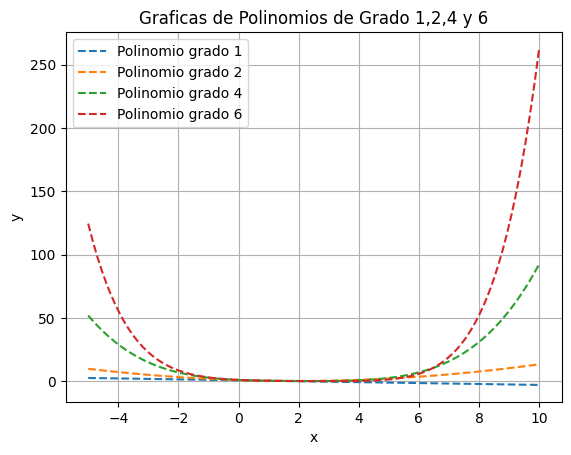

0.128237454702292 0.12823660501377343



,P(x),f(x),|P(x) - f(x)|,E_r
0,0.128237,0.128237,8.496885e-07,0.000007


In [14]:
def cota_taylor(f, x0, x_point, n):
  ux = np.linspace(min(x0, x_point), max(x0, x_point), 500)
  df = sp.diff(f, x, n + 1)
  df = sp.lambdify(x, df)
  max_df = max(abs(df(ux)))
  R_n = max_df*abs(x_point - x0)**(n + 1)/factorial(n + 1)
  return R_n

def serie_taylor(f, x0, n):
  P = 0
  for k in range(n + 1):
    df = sp.diff(f, x, k)
    df = df.evalf(subs = {x:x0})
    P += df * (x - x0) ** k / (factorial(k))
  return P

def P(i):
  return poli.evalf(subs = {x:i})

# Creo nuevo entorno de variables
x = sp.symbols('x')
f = 3**(-x)
x0 = 1
x_point = 1
n = 5

cota = cota_taylor(f, x0, x_point, n)
poli = serie_taylor(f, x0, n)

print(f'la cota del error es: {cota} y el polinomio es: {poli}')

# Generar el polinomio para todos los grados
P1 = serie_taylor(f, x0, 1)
P2 = serie_taylor(f, x0, 2)
P4 = serie_taylor(f, x0, 4)
P6 = serie_taylor(f, x0, 6)

# Para poder graficar mejor convertimos a funciones numericas
P1_num = sp.lambdify(x, P1, 'numpy')
P2_num = sp.lambdify(x, P2, 'numpy')
P4_num = sp.lambdify(x, P4, 'numpy')
P6_num = sp.lambdify(x, P6, 'numpy')

# Creo el arreglo de puntos para graficar
lin_space = np.linspace(-5, 10, 100)

plt.plot(lin_space, P1_num(lin_space), '--', label='Polinomio grado 1')
plt.plot(lin_space, P2_num(lin_space), '--', label='Polinomio grado 2')
plt.plot(lin_space, P4_num(lin_space), '--', label='Polinomio grado 4')
plt.plot(lin_space, P6_num(lin_space), '--', label='Polinomio grado 6')

plt.title('Graficas de Polinomios de Grado 1,2,4 y 6')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

integral_real = sp.integrate(f,(x, 1, 1.5))
integral_aprox = sp.integrate(poli, (x, 1, 1.5))
print(float(integral_real), float(integral_aprox))
print('')

values = []
values.append([float(integral_real), float(integral_aprox), abs(float(integral_real - integral_aprox)), abs(float((integral_real - integral_aprox) / integral_aprox))])
Data = pd.DataFrame( data = values, columns = ['P(x)', 'f(x)', '|P(x) - f(x)|', 'E_r'])
Data

## Taller 3


In [15]:
def newton(f_sym, x0, tol, max_iter=200):
  # Detectar automáticamente la variable simbólica
  var = list(f_sym.free_symbols)[0]

  # Derivada y fórmula de Newton
  df = sp.diff(f_sym, var)
  new_expr = var - f_sym/df

  error = 1
  x = float(x0)
  it = 0

  while error > tol and it < max_iter:
    x1 = float(new_expr.evalf(subs={var: x}))
    error = abs(x1 - x)
    it += 1
    x = x1

  return x, it

#---------------------------------------------------------------------------------------------------------------

# Primero se debe verificar o garantizar la existencia del cero o de la raiz
def biseccion(function, a, b, tolerance):

  if (function(a) * function(b) < 0):
    # print('Buscando la solucion ...')
    iterations = 0

    c = (a + b) / 2
    while (abs(b - a) > tolerance):
      iterations += 1
      c = (a + b) / 2
      if (abs(function(c)) < tolerance):
        break
      if (function(a) * function(c) < 0):
        b = c
      else:
        a = c
    # print(f'la solucion es: {c} y las iteraciones son {iterations}')
    return c, iterations

  else:
    print('La funcion no cumple el teorema en el intervalo, cambie el intervalo')

#---------------------------------------------------------------------------------------------------------------

# Primero se debe verificar o garantizar la existencia del cero o de la raiz
def false_position(function, a, b, tolerance):

  if (function(a) * function(b) < 0):
    # print('Buscando la solucion ...')
    iterations = 0
    array_points = []

    c = b - function(b) * ((a - b) / (function(a) - function(b)))

    while (abs(function(c)) > tolerance):

      iterations += 1
      array_points.append((a , b))
      c = b - function(b) * ((a - b) / (function(a) - function(b)))

      if (abs(function(c)) < tolerance):
        break
      if (function(a) * function(c) < 0):
        b = c
      else:
        a = c
    # print(f'la solucion es: {c} y las iteraciones son {iterations}')
    return c, iterations

  else:
    print('La funcion no cumple el teorema en el intervalo, cambie el intervalo')


In [20]:
# determinar h

x = sp.symbols('x')
r = 1
v_3 = 0.75
tol = 1e-8
xo = 1

function_example = (sp.pi*(x)**2)*(3*r - x)*(1/3) - v_3

In [21]:
answer, iterations = newton(function_example, xo, tol)
print(f'La profundidad de h por el metodo de Newton es {answer} con {iterations} iteraciones')

La profundidad de h por el metodo de Newton es 0.5395184017118599 con 5 iteraciones


In [22]:
function_example_false_position = lambda x: (np.pi * (x)**2) * (3*r - x) * (1/3) - v_3
a = 0
b = 2
tolerance = 1e-8

answer_2, iterations_2 = false_position(function_example_false_position, a, b, tolerance)
print(f'La profundidad de h por el metodo de Falsa Posicion es {answer_2} con {iterations_2} iteraciones')

La profundidad de h por el metodo de Falsa Posicion es 0.5395184005354985 con 5 iteraciones


In [23]:
function_example_biseccion = lambda x: (np.pi * (x)**2) * (3*r - x) * (1/3) - v_3
a = 0
b = 2
tolerance = 1e-8

answer_3, iterations_3 = biseccion(function_example_biseccion, a, b, tolerance)
print(f'La profundidad de h por el metodo de Biseccion es {answer_3} con {iterations_3} iteraciones')

La profundidad de h por el metodo de Biseccion es 0.5395184010267258 con 27 iteraciones


## Taller 5

In [ ]:
# Creacion de los arreglos que se emplearan
x_data = np.array([0, 6, 10, 13, 17, 20, 28], float)

y1_data = np.array([6.67, 17.33, 42.67, 37.33, 30.10, 29.31, 28.74], float)
y2_data = np.array([6.67, 16.11, 18.89, 15.00, 10.56, 9.44, 8.89], float)


# Creacion de las matrices
matriz = matriz_polinomial(x_data)


# Despues conseguimos los valores para cada polinomio
coef_1 = solucion_gaussiana(matriz, y1_data)
print(f"Los coeficientes de y1_data son: {coef_1}\n")

coef_2 = solucion_gaussiana(matriz, y2_data)
print(f"Los coeficientes de y2_data son: {coef_2}\n")

In [27]:
# Construccion del Polinomio
polinomio_hojas_jovenes = lambda x: sum(coef_1[i]*(x**i) for i in range (len(coef_1)))
polinomio_hojas_maduras = lambda x: sum(coef_2[i]*(x**i) for i in range (len(coef_2)))

In [ ]:
ux = np.linspace(min(x_data),max(x_data), 1000)

# Color de linea
color_jovenes = '#ff0000'
color_maduras = '#a000c8'

# Color de puntos
color_puntos_jovenes = '#008000'
color_puntos_maduras = 'black'

# Graficar curvas de los polinomios
plt.plot(ux, polinomio_hojas_jovenes(ux) , color = color_jovenes, label = 'Hojas Jóvenes', linewidth = 2)
plt.plot(ux, polinomio_hojas_maduras(ux) , color = color_maduras, label = 'Hojas Maduras', linewidth = 2)

# Graficar puntos observados
plt.plot(x_data, y1_data, 'o', color = color_puntos_jovenes, label = 'Datos Jóvenes')
plt.plot(x_data, y2_data, 'o', color = color_puntos_maduras, label = 'Datos Maduras')

# Estética
plt.xlabel('Dia')
plt.ylabel('Peso (mg)')
plt.title('Crecimiento de las Larvas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Taller 6

#**Ejercicio**
Se recolectaron datos relacionados con el contador de una particular grabadora con su  tiempo de uso. ¿Cómo podríamos construir un modelo empírico para predecir la cantidad de tiempo transcurrido de una grabadora como función de su contador de  lectura?.

|ci  |100  |200  |300  |400  |500 | 600 | 700 | 800|
|---|------|------|-----|----|----|----|-----|-----|
| ti |205  |430  |677  |  945|1233| 1542| 1872| 2224|


1. Construir un polinomio que pase por cada uno de los datos(polinomial simple o lagrange) (x: Contador de lectura)(y: Tiempo de uso).
2. Regresión por minimos cuadrados de los datos
3. Grafico de dispersión(x vs y), polinomio(simple o lagrange), regresion
4. Calcular el contador de lectura para un tiempo de uso de 2000 unidades de tiempo. P(x)=2000, donde x es el contador y P(x)= tiempo de uso. Usar un método de ceros de funciones.... Función P(x)-2000=0. (polinomio y con la regresión)
5.  Cuál de los dos modelos es el que mejor se adapta al comportamiento de los datos.

In [30]:
# Necessary Imports
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.abc import x # Import 'x' from sympy.abc

#-----------------------------------------------------------------------------------------------

def least_squares(x_array, y_array):

  if len(x_array) != len(y_array): # Check the lenght of Y is like X
    raise ValueError("Los arrays deben tener la misma longitud.")

  # Transform the list as Array with numpy
  x = np.array(x_array)
  y = np.array(y_array)

  n = len(x)
  Sx_i = np.sum(x)
  Sy_i = np.sum(y)
  Sx_i2 = np.sum(x**2)
  Sx_iy_i = np.sum(x * y)
  denominator = n * Sx_i2 - (Sx_i)**2

  if denominator == 0: # Division by zero
    raise ValueError("Se divide por 0, todos los X son iguales")

  # Calculate m(slope) and b(intercept)
  m = (n * Sx_iy_i - Sx_i * Sy_i) / denominator
  b = (Sx_i2 * Sy_i - Sx_i * Sx_iy_i) / denominator
  return m, b

#-----------------------------------------------------------------------------------------------

def lagrange_interpolation(x_d, y_d):

  n = len(x_d)

  if n != len(y_d):
    raise ValueError("Las listas de x_d y y_d deben tener la misma longitud.")
  if n < 1:
    raise ValueError("No hay puntos en X, el polinomio es 0")
  if len(set(x_d)) != n:
    raise ValueError("Los nodos x deben ser únicos para evitar división por cero en el denominator.")

  P_x = 0

  for i in range(n):
    L_i = 1
    for j in range(n):
      if j != i:
        # Construction the term: (x - x_j) / (x_i - x_j)
        numerator = x - x_d[j]
        denominator = x_d[i] - x_d[j]
        L_i *= numerator / denominator
    P_x += L_i * y_d[i]
  return sp.expand(P_x)

#-----------------------------------------------------------------------------------------------

def newton(f_sym, x0, tol=1e-8, max_iter=200):
  # Detectar automáticamente la variable simbólica
  var = list(f_sym.free_symbols)[0]

  # Derivada y fórmula de Newton
  df = sp.diff(f_sym, var)
  new_expr = var - f_sym/df

  error = 1
  x = float(x0)
  it = 0

  while error > tol and it < max_iter:
    x1 = float(new_expr.evalf(subs={var: x}))
    error = abs(x1 - x)
    it += 1
    x = x1

  return x, it

In [ ]:
# Data
x_data = np.array([100, 200, 300, 400, 500, 600, 700, 800])
y_data = np.array([205, 430, 677, 945, 1233, 1542, 1872, 2224])

In [ ]:
# Point 1
polynomial = lagrange_interpolation(x_data, y_data)
polynomial

In [ ]:
# Point 2
slope, intercept = least_squares(x_data, y_data)

print(f"La Pendiente es {slope} y el intercept es {intercept}")

In [ ]:
# Point 3
ecuacion = lambda x: slope*x + intercept
polynomial_lambda = sp.lambdify(x, polynomial, 'numpy')

ux_least_squares = np.linspace(min(x_data), max(x_data), 800) # Least squares
ux_lagrange_interpolation = np.linspace(min(x_data), max(x_data), 800) # Lagrange interpolation

plt.plot(ux_least_squares, ecuacion(ux_least_squares), color = 'blue', label ='Regresión')
plt.plot(x_data, y_data, 'or', label ='Datos observados')
plt.plot(ux_lagrange_interpolation, polynomial_lambda(ux_lagrange_interpolation), color = 'brown', label = 'Polinomio', linewidth = 2)

plt.xlabel('Contador de lectura (ci)')
plt.ylabel('Tiempo de uso (ti)')
plt.title('Fuerza aplicada a un resorte')
plt.grid(True)
plt.legend()
plt.yticks(np.arange(0, 2500, 250))
plt.show()

In [ ]:
# Point 4
function_polynomial = polynomial - 2000
ecuation_zeros = (slope * x) + intercept - 2000

# We do the graph to identificate de interval with 0
graph = sp.lambdify(x, function_polynomial, 'numpy')
ecuation_zeros_lambda = sp.lambdify(x, ecuation_zeros, 'numpy')

plt.plot(ux_least_squares, ecuation_zeros_lambda(ux_least_squares), 'b', label = 'Regresión') # Least squares
plt.plot(ux_lagrange_interpolation, graph(ux_lagrange_interpolation), color = 'brown', label = 'Polinomio', linewidth=2) # Lagrange interpolation

plt.xlabel('Contador de lectura (ci)')
plt.ylabel('Tiempo de uso (ti)')
plt.grid(True)
plt.legend()
plt.show()

result_lagrange_interpolation, iteraciones = newton(function_polynomial, 700)
result_least_squares, iteraciones2 = newton(ecuation_zeros, 700)

print(f'\nEl contador de lectura para 2000 utilizando polinomio de lagrange es de :{result_lagrange_interpolation}')
print(f'El contador de lectura para 2000 utilizando regresion lineal es de :{result_least_squares}')

## Taller 7

In [ ]:
def least_squares(x_array, y_array):

  if len(x_array) != len(y_array): # Check the lenght of Y is like X
    raise ValueError("Los arrays deben tener la misma longitud.")

  # Transform the list as Array with numpy
  x = np.array(x_array)
  y = np.array(y_array)

  n = len(x)
  Sx_i = np.sum(x)
  Sy_i = np.sum(y)
  Sx_i2 = np.sum(x**2)
  Sx_iy_i = np.sum(x * y)
  denominator = n * Sx_i2 - (Sx_i)**2

  if denominator == 0: # Division by zero
    raise ValueError("Se divide por 0, todos los X son iguales")

  # Calculate m(slope) and b(intercept)
  m = (n * Sx_iy_i - Sx_i * Sy_i) / denominator
  b = (Sx_i2 * Sy_i - Sx_i * Sx_iy_i) / denominator
  return m, b

In [ ]:
def graph_transformation(x_data, y_data):
  plt.figure(figsize = (15, 15), dpi = 70)

  # First curve (x, y)
  plt.subplot(331)
  plt.plot(x_data, y_data, 'or', label = 'Datos Originales')
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.title('Datos Originales ($x, y$)', fontweight = 'bold', fontsize = 8)

  # Second curve (x, sqrt(y))
  plt.subplot(332)
  plt.plot(x_data, np.sqrt(y_data), 'mo', label = 'Datos Originales')
  plt.xlabel('$x$')
  plt.ylabel('$\\sqrt{y}$')
  plt.title('Transformacion ($x, \\sqrt{y}$)', fontweight = 'bold', fontsize = 8)

  # Third curve (x, 1/y))
  plt.subplot(333)
  plt.plot(x_data, (1/y_data), 'go', label = 'Datos Originales')
  plt.xlabel('x')
  plt.ylabel('$\\frac{1}{y}$')
  plt.title('Transformacion ($x, \\frac{1}{y}$)', fontweight = 'bold', fontsize = 8)

  # Fourth curve (x^2, y))
  plt.subplot(334)
  plt.plot((x_data)**2, y_data, 'ko', label = 'Datos Originales')
  plt.xlabel('$x^{2}$')
  plt.ylabel('y')
  plt.title('Transformacion ($x^{2}, y$)', fontweight = 'bold', fontsize = 8)

  # Fifth curve (x^3, y))
  plt.subplot(335)
  plt.plot((x_data)**3, y_data, 'bo', label = 'Datos Originales')
  plt.xlabel('$x^3$')
  plt.ylabel('$y$')
  plt.title('Transformacion ($x^{3}, y$)', fontweight = 'bold', fontsize = 8)

  # Sixth curve (log x, y))
  plt.subplot(336)
  plt.plot(np.log(x_data), y_data, 'yo', label = 'Datos Originales')
  plt.xlabel('$Log x$')
  plt.ylabel('$y$')
  plt.title('Transformacion ($Log x, y$)', fontweight = 'bold', fontsize = 8)

  # Seventh curve (x, log y))
  plt.subplot(337)
  plt.plot(x_data, np.log(y_data), 'co', label = 'Datos Originales')
  plt.xlabel('$x$')
  plt.ylabel('$Log y$')
  plt.title('Transformacion ($x, Log y$)', fontweight = 'bold', fontsize = 8)

  # Eighth curve (sqrt(x), y))
  plt.subplot(338)
  plt.plot(np.sqrt(x_data), y_data, 'mo', label = 'Datos Originales')
  plt.xlabel('$\\sqrt{x}$')
  plt.ylabel('$y$')
  plt.title('Transformacion ($\\sqrt{x}, y$)', fontweight = 'bold', fontsize = 8)

  # Ninth curve (log x, log y))
  plt.subplot(339)
  plt.plot(np.log(x_data), np.log(y_data), 'ro', label = 'Datos Originales')
  plt.xlabel('$Log x$')
  plt.ylabel('$Log y$')
  plt.title('Transformacion ($Log x, Log y$)', fontweight = 'bold', fontsize = 8)

In [ ]:
def coef_determinante(m, b, x_data_transformada, y_data_transformada):
  linea = m * x_data_transformada + b # (y^)
  promedio = np.mean(y_data_transformada) # (y barra)
  s1 = sum((y_data_transformada - linea)**2)
  s2 = sum((y_data_transformada - promedio)**2)
  r_square = 1 - (s1/s2)
  return r_square

###  Ejercicio 2

####  **Ejercicio 2**

La frecuencia cardíaca de las aves. Los animales de sangre caliente utilizan grandes cantidades de energía para mantener temperatura corporal debido a la pérdida de calor a través de la superficie corporal. De hecho, los biólogos creen que la principal pérdida de energía de un animal de sangre caliente en reposo es el mantenimiento. de la temperatura corporal.

|Ave|Peso Corporal(g)|Frecuencia cardiaca(latidos por minuto)|
|----|---------------|--------------------------------------|
|Canario|20|1000|
|Paloma |300 |185|
|Cuervo|341 |378|
|Ratonera|658 |300|
|Pato |1100 |190|
|Gallina |2000| 312|
|Ganso| 2300| 240|
|Turquía |8750| 193|
|Avestruz |71000 |60–70|

1 . Use aproximación cambiado la escala de los datos y construya un modelo no lineal para predecir los latidos de un águila harpía de 5000 gramos  
2.  Colibrí abeja pesa  2.5g(El ritmo cardíaco de un colibrí varía entre 250 y 1,200 latidos por minuto (lpm), siendo más rápido en vuelo activo (hasta 1,200 lpm) y más lento en reposo (alrededor de 250 lpm))

In [ ]:
# Datos
x_data_birds = np.array([20, 300, 341, 658, 1100, 2000, 2300, 8750, 710000], float)
y_data_birds = np.array([1000, 185, 378, 300, 190, 312, 240, 193, 65], float)

In [ ]:
# Analizo el coeficiente de determinantes mas adecuado para la solucion (Logx, y) y (Logx, Logy)

# Logx, y
m_birds_1, b_birds_1 = least_squares(np.log(x_data_birds), y_data_birds)
r_2_birds_1 = coef_determinante(m_birds_1, b_birds_1, np.log(x_data_birds), y_data_birds)
print(f' Grafica (Logx , y) - La pendiente {m_birds_1} y el intercepto {b_birds_1}, y el coeficiente de linealizacion es: {r_2_birds_1}')

# Logx, Logy
m_birds_2, b_birds_2 = least_squares(np.log(x_data_birds), np.log(y_data_birds))
r_2_birds_2 = coef_determinante(m_birds_2, b_birds_2, np.log(x_data_birds), np.log(y_data_birds))
print(f' Grafica (Logx , y) - La pendiente {m_birds_2} y el intercepto {b_birds_2}, y el coeficiente de linealizacion es: {r_2_birds_2}')

In [ ]:
# Modelo: Escala (Log x) vs (Log y)

m_birds_2, b_birds_2 = least_squares(np.log(x_data_birds), np.log(y_data_birds))
r_2_birds_2 = coef_determinante(m_birds_2, b_birds_2, np.log(x_data_birds), np.log(y_data_birds))

line_birds = lambda x: m_birds_2 * x + b_birds_2
model_birds = lambda x: x**m_birds_2 * np.exp(b_birds_2)

ux_birds = np.linspace(x_data_birds.min(), x_data_birds.max(), 100)
ux_birds_2 = np.linspace(np.log(x_data_birds).min(), np.log(x_data_birds).max(), 100)

# Grafica Datos en Escala
plt.figure(figsize = (8, 4), dpi = 80)
plt.subplot(121)
plt.plot(np.log(x_data_birds), np.log(y_data_birds), 'or', label = 'Datos en escala')
plt.plot(ux_birds_2, line_birds(ux_birds_2), 'b', label = 'MC')
plt.legend()

# Grafica en Datos Originales
plt.subplot(122)
plt.plot(x_data_birds, y_data_birds, 'or', label = 'Datos originales')
plt.plot(ux_birds, model_birds(ux_birds), 'b', label = 'Modelo')
plt.legend()
plt.tight_layout()
plt.show()

## taller 8

![image](github/ElCabris)

## Taller 9



In [34]:
def euler(f, a, b, h, co):
  n = int((b - a)/h)
  w = [co]
  t = np.linspace(a, b, n + 1)
  for i in range(n):
    w.append(w[i] + h * f(t[i], w[i]))
  return t, w

In [35]:
def boya(t, z):
  # Declaro las variables y las ecuaciones que se solucionaran
  u = z[0]
  w = z[1]

  g = 9.8
  h = 2

  ecuation_1 = w
  ecuation_2 = - g * ((3 * u)/ h - (1/2))

  return np.array([ecuation_1, ecuation_2])

In [36]:
t, w = euler(boya, 0, 10, 0.01, [0, 5])

x = np.array(w)[:, 0]
x_2 = np.array(w)[:, 1]

print(x)
print(x_2)

[0.         0.05       0.10049    ... 1.15000028 1.25274566 1.35429054]
[ 5.          5.049       5.09065    ... 10.27453833 10.15448829
 10.01933468]


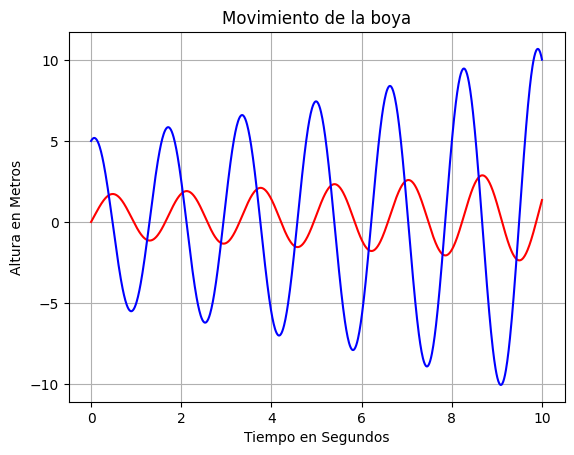

In [37]:
import matplotlib.pyplot as plt

plt.plot(t, x, color = 'red')
plt.plot(t, x_2, color = 'blue')
plt.title("Movimiento de la boya")
plt.xlabel("Tiempo en Segundos")
plt.ylabel("Altura en Metros")
plt.grid()
plt.show()

## taller 9

#### Ejercicio
Supongamos que después de que Denise y Chad rompen su compromiso, Chad es reemplazadado por Craig en los sentimientos de Denise, pero su relación sigue en gran medida el mismo patrón que tuvieron Denise y Chad. Denise y Craig toman juntos una clase de Ingienería  donde se les asigna como compañeros de laboratorio. Tienen que completar una nueva práctica cada $2\pi/c$ semanas, donde $c$ es una constante positiva. Supongamos que el impacto del afecto de Denise por Craig a partir de la experiencia de trabajar juntos agrega el término $\sin{ct}$ a la razón de cambio del cariño de ella al tiempo $t$.
 Por ejemplo, durante la última parte de cada práctica de laboratorio, la tensión que sufre Denise al intentar arreglárselas con la tardanza de Craig reduce su afecto hacia él. Sus emociones están descritas por:

 \begin{equation}
     x'=y+\sin{ct}; \quad y'=-4x
 \end{equation}
 Estudie la solución para las emociones iniciales dadas por $x(0)=y(0)=0$, lo que significa que si ellos no fueran forzados a trabajar juntos, no tendría sentimientos entre si. Como cambia esta relación  a medida que $c$ se aproxima a 2 y luego excede esto valor.

1. Solucionar el sistema de ecuaciones diferenciales de primer orden por el método de Euler para $c=0.5, \quad c=1.5, \quad c=2.2, \quad c=3$.
2. Ilustre los sentimientos de Denise vs los sentimientos de Craig.
3. Ilustre los sentimientos de Denise e interprete.
4. Ilustre los sentimiento de Craig e interprete

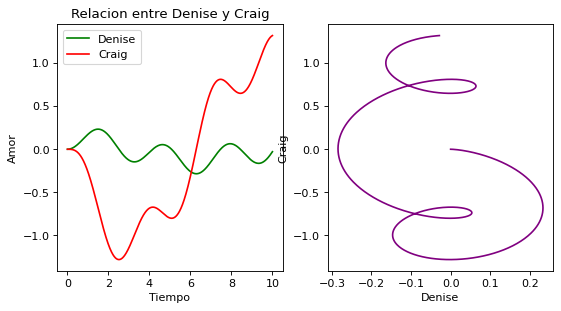

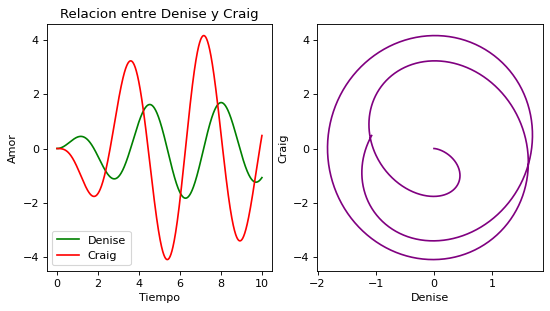

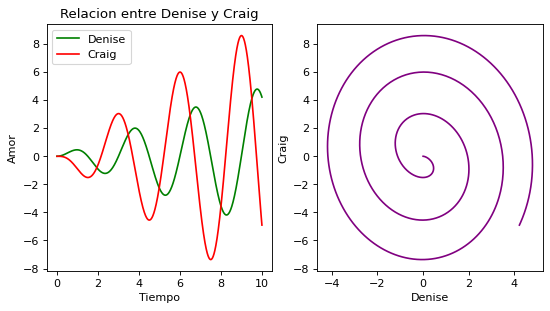

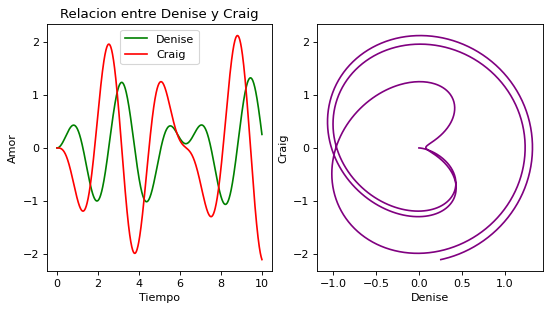

In [38]:
import matplotlib.pyplot as plt

def relacion(t, z):
  x = z[0] # Sentimiento inicial Denise
  y = z[1] # Sentimiento inicial Craig

  denise = y + np.sin(c * t)
  craig = -4 * x
  return np.array([denise, craig])

for c in [0.5, 1.5, 2.2, 3]:
  t, w = euler(relacion, 0, 10, 0.01, [0, 0])
  denise = np.array(w)[:, 0]
  craig = np.array(w)[:, 1]
  plt.figure(figsize = (8, 4), dpi = 80)
  plt.subplot(121)
  plt.plot(t, denise, 'g', label = 'Denise')
  plt.plot(t, craig, 'r', label = 'Craig')
  plt.legend()
  plt.xlabel('Tiempo')
  plt.ylabel('Amor')
  plt.title('Relacion entre Denise y Craig')
  plt.subplot(122)
  plt.plot(denise, craig, 'purple')
  plt.ylabel('Craig')
  plt.xlabel('Denise')
  plt.show()


## Taller 10

In [ ]:
def runge4(f, a, b, h, co):
  n = int((b - a)/ h)
  t = np.linspace(a, b, n + 1)
  wr = [co] # la condicion inicial o las condiciones iniciales
  for i in range(n):
    k1 = h * f(t[i], wr[i])
    k2 = h * f(t[i] + 0.5 * h, wr[i] + 0.5 * k1)
    k3 = h * f(t[i] + 0.5 * h, wr[i] + 0.5 * k2)
    k4 = h * f(t[i + 1], wr[i] + k3)
    wr.append(wr[i] + (1/6)*(k1 + (2 * k2) + (2 * k3) + k4))
  return t, wr

#### Ejercicio

  El sistema de ecuaciones diferenciales $x'=y-cx$, $y'=-2x$ es un modelo para Denise y Chad con condiciones iniciales $x(0)=0 \quad y(0)=2.5$ teniendo en cuenta la instromisión de los padres. Es  posible elegir la constante $c$ de tal modo que Denise y Chad con el tiempo no tengan ningún sentimiento entre ellos, pero que se relaciones  de tal manera que se gusten hasta el final?

1.  Solucionar el sistema de ecuaciones diferenciales con el método de Runge - Kutta
2.  Ilustre los sentimientos de Denise e interprete
3. Ilustre los sentimiento de Chad e interprete


In [42]:
def runge4(f, a, b, h, co):
  n = int((b - a)/ h)
  t = np.linspace(a, b, n + 1)
  wr = [co] # la condicion inicial o las condiciones iniciales
  for i in range(n):
    k1 = h * f(t[i], wr[i])
    k2 = h * f(t[i] + 0.5 * h, wr[i] + 0.5 * k1)
    k3 = h * f(t[i] + 0.5 * h, wr[i] + 0.5 * k2)
    k4 = h * f(t[i + 1], wr[i] + k3)
    wr.append(wr[i] + (1/6)*(k1 + (2 * k2) + (2 * k3) + k4))
  return t, wr

In [43]:
def intromision(t, pareja):
  x = pareja[0]
  y = pareja[1]
  sent_d = y - c * x
  sent_c = -2 * x
  return np.array([sent_d, sent_c])

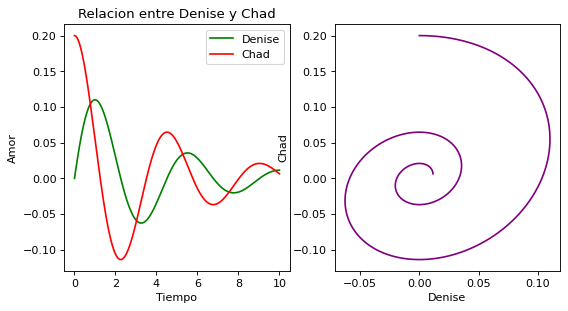

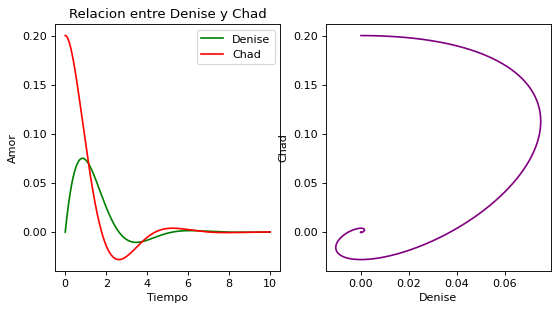

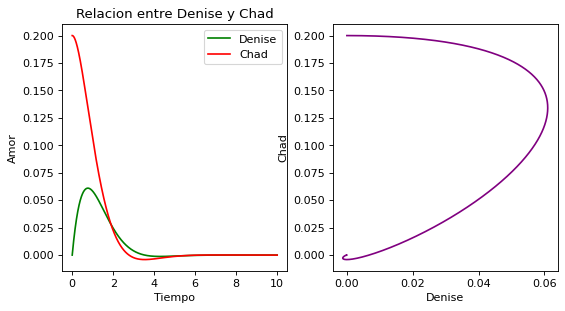

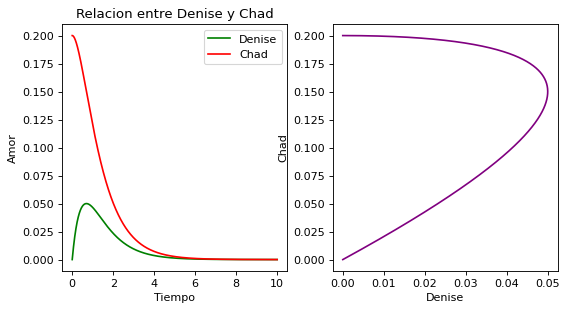

In [44]:
for c in [0.5, 1.5, 2.2, 3]:
  t, w = runge4(intromision, 0, 10, 0.001, [0, 00000000.2])
  denise = np.array(w)[:, 0]
  chad = np.array(w)[:, 1]

  plt.figure(figsize = (8, 4), dpi = 80)
  plt.subplot(121)
  plt.plot(t, denise, 'g', label = 'Denise')
  plt.plot(t, chad, 'r', label = 'Chad')
  plt.legend()
  plt.xlabel('Tiempo')
  plt.ylabel('Amor')
  plt.title('Relacion entre Denise y Chad')
  plt.subplot(122)
  plt.plot(denise, chad, 'purple')
  plt.ylabel('Chad')
  plt.xlabel('Denise')
  plt.show()